휴학을 하고 여러 공부를 했다.

나의 휴학 목표는 소프트웨어융합학과 복수전공을 내년 상반기에 시작하는 것 + 코딩공부가 향상이기 때문에 내가 관심있는 머신러닝 분야를 많이 공부했다. 

지금까지 한 공부로는
1. 코드잇 머신러닝을 통한 머신러닝 공부
2. 위에 공부에서 부족함을 느껴서 [파이썬 머신러닝 완벽가이드](https://github.com/donghui-0126/machine-learning/tree/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC%20%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%20%EC%99%84%EB%B2%BD%20%EA%B0%80%EC%9D%B4%EB%93%9C)책을 이용한 머신러닝 공부
3. \[[카페 사진 감성 분석](https://github.com/donghui-0126/mini-project/tree/main/%EC%B9%B4%ED%8E%98%20%EC%82%AC%EC%A7%84%20%EA%B0%90%EC%84%B1%20%EB%B6%84%EC%84%9D)\]프로젝트

를 했다. 


이 공부를 하고 다음 공부를 무엇을 할 지 후보를 정해봤다. 
- 머신러닝을 좀더 자세하게 공부하기
- 딥러닝에 대해서 공부하기
- html/css/javascript(웹) 공부하기
- django 라이브러리 공부하기
가 후보 군에 있었는데, 나는 딥러닝을 공부해보고 싶었다.

그 이유는 전에 dacon에서 진행되는 머신러닝 대회([청경채 성장 분석](https://dacon.io/competitions/official/235961/codeshare/6021?page=1&dtype=recent))를 하려고 했다.<br>
그때 나는 내가 배운 머신러닝으로 작성할 엄두안났는데(물론 나의 머신러닝실력도 하찮지만..) 예제 코드를 보니 딥러닝 기법을 사용한 코드가 적혀있었다. 

그것을 보고 충격을 받아서 딥러닝도 공부하기로 결심했다. 꼭 그거 때문만은 아니고 재밌어 보여서도 있다! ㅎㅎ ~~공부n일차: 상당히 재미지다.~~

딥러닝은 10장 11장 12장을 공부하고 다시 머신러닝을 공부할 생각이다. 

아마 머신러닝의 추가적인 공부/프로젝트/웹/django(백엔드) 공부를 병행할 것 같다. 


-----

이제 본격적인 공부를 시작할 건데, 나는 핸즈온 머신러닝 으로 공부하기로 했다.

이 책이 좋다고 하던데 마침 전공책으로도 쓰여서 미리 봐두면 좋을 것 같기 때문이다. 

책에다 밑줄을 그으면서 공부하기 때문에, 여기는 굉장히 중요하다는 개념이나 코드들만 적힐 것이다. 

-----------
이전에 간단하게 공부했던 deep-leraning 정리본 링크이다.<br>
https://github.com/donghui-0126/machine-learning/tree/main/deep-learning

-----

### 연습문제 1 
https://playground.tensorflow.org

### 텐서플로우 설치하기

In [4]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
print(keras.__version__)

2.10.0
2.10.0


### 케라스를 사용해서 데이터셋 적재하기

In [2]:
fashion_mnist= keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
X_train_full.shape
# 784크기(1d)로 데이터가 나열된 사이킷런의 mnist데이터(matrix)와 다르게 28x28 배열로 이루어짐(tensor).

(60000, 28, 28)

In [4]:
X_train_full.dtype

dtype('uint8')

### 트레인셋을 검정셋과 트레인셋으로 나누고 0~1사이의 범위로 스케일 변환
검증셋이 없으면 트레인셋에 대한 과대적합이 일어날 수도 있기 때문에 유의해야한다.

In [5]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test/255.0

### class_names

In [6]:
class_names = ['T-shirt/top', "Trouser", "Pullover", "Dress", "Coat", "Sandal", " Shirt","Sneaker", "Bag", "Ankle boot"]

### 시퀀셜 API를 사용해서 모델 만들기

In [7]:
# Sequential 모델을 만든다. 이 모델을 가장 간단한 케라스의 신경망 모델이다.
#순서대로 연결된 층을 일렬로 쌓아서 구성한다.
model = keras.models.Sequential() 

# 첫번째 층을 만들고 모델에 추가함. Flatten층은 입력이미지를 1D 배열로 변환한다. 
# 즉, 입력 데이터 X를 받으면 X.reshape(-1, 28*28)을 계산한다. 이층은 모델 파라미터를 가지지 않고, 간단한 전처리만 수행한다.
# 모델의 첫번째 층이므로 input_shape를 지정해야한다. 여기에는 배치 크기를 제외한 샘플의 크기만 써야한다. 
model.add(keras.layers.Flatten(input_shape=[28,28]))

# 뉴런 300개를 가진 Dense 은닉층을 추가한다. 이 층의 활성화 함수는 ReLU가 사용된다. 
# Dense층 마다 각자 가중치행렬을 관리한다. 이 행렬에는 뉴런과 입력 사이의 모든 연결 가중치가 포함된다. 
# 또한 뉴런마다 하나씩 있는 편향도 벡터로 관리한다.
model.add(keras.layers.Dense(300,activation='relu'))

# 다음층도 뉴런 100개를 가진 활성화 함수가 ReLU인 Dense은닉층을 추가한다.
model.add(keras.layers.Dense(100,activation='relu'))

# 마지막으로 뉴런 10개를 가진 Dense층을 추가한다. 배타적인 클래스이기 때문에 soft_max함수를 사용한다.
model.add(keras.layers.Dense(10,activation='softmax'))

In [8]:
# 위와 같은 코드를 다른 방식으로 작성하는 코드이다.
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [9]:
model.summary()
# dense_6은 784 * 300 (가중치 개수) + 300 (편향개수) =235500 만큼의 파라미터를 가진다.

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.layers

### 각 층에 인덱스로 접근

In [11]:
hidden1 = model.layers[1]
hidden1.name

'dense_3'

### 각 층의 가중치과 편향을 얻는 함수

In [12]:
W, b = hidden1.get_weights()
print(W.shape)
W[:5]

(784, 300)


array([[-0.00421565, -0.00351667,  0.05101556, ..., -0.0108448 ,
         0.01602399, -0.03167915],
       [ 0.00324626,  0.01552586,  0.04142319, ..., -0.07091267,
        -0.02079091, -0.00040959],
       [ 0.02905273, -0.05547583,  0.03890333, ..., -0.04754068,
         0.01252925,  0.03921711],
       [-0.05560946, -0.05324187, -0.03196876, ...,  0.07071427,
         0.04005713,  0.0312743 ],
       [ 0.01593808, -0.02285301, -0.04381575, ...,  0.04904685,
        -0.03033808,  0.03853341]], dtype=float32)

In [13]:
print(b.shape)
b[:10]

(300,)


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

### 모델 컴파일
사용할 손실함수와 옵티마이저를 지정

In [14]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

위 코드에 대한 설명이 필요할 것 같다.

위 코드에서 클래스가 배타적이므로 sparse_categorical_crossentropy 를 사용한다. <br>
만약 샘플마다 클래스 별 타깃 확률을 가지고 있다면 catergorical_crossentropy 손실을 사영해야한다.<br>
이진 분류나 다중 레이블 이진 분류를 수행한다면 출력층에 "softmax"대신 "sigmoid"를 사용하고 "binary_crossentropy"손실을 사용한다.

옵티마이저에 "sgd"를 지정하면 기본 확률적 경사하강법을 사용해서 모델을 훈련한다는 의미이다. 즉, 역전파 알고리즘을 수행하는 것이다.

마지막으로 분류기 이므로 훈련과 평가시에 정확도를 측정하기 위해서 "accuracy"로 지정한다.

### 모델훈련과 평가

In [15]:
history = model.fit(X_train, y_train, epochs=30,
                   validation_data = (X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.7261 - accuracy: 0.7597 - val_loss: 0.5212 - val_accuracy: 0.8224
Epoch 2/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4909 - accuracy: 0.8296 - val_loss: 0.5058 - val_accuracy: 0.8264
Epoch 3/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4438 - accuracy: 0.8458 - val_loss: 0.4042 - val_accuracy: 0.8634
Epoch 4/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4146 - accuracy: 0.8540 - val_loss: 0.4318 - val_accuracy: 0.8472
Epoch 5/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3942 - accuracy: 0.8626 - val_loss: 0.3879 - val_accuracy: 0.8638
Epoch 6/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3781 - accuracy: 0.8663 - val_loss: 0.3760 - val_accuracy: 0.8674
Epoch 7/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3630 - accuracy: 0.8706 - val_loss: 0.3616 - val_accuracy:

<b>특정 클래스가 조금 등장하는 비대칭적 데이터의 경우에는 fit()메소드를 호출할 때 class_weight 매개변수를 지정하는 것이 좋다. 샘플별로 가중치를 부여하고 싶다면 sample_weight 매개변수를 지정하면 된다. (두값이 모두 지정되면 곱해서 사용한다.)<b>

### 모델을 다시 fit하면 이어서 fit 된다.

In [16]:
model.fit(X_train, y_train, epochs=10,
                   validation_data = (X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2203 - accuracy: 0.9203 - val_loss: 0.3215 - val_accuracy: 0.8858
Epoch 2/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2165 - accuracy: 0.9229 - val_loss: 0.2899 - val_accuracy: 0.8974
Epoch 3/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2133 - accuracy: 0.9243 - val_loss: 0.2883 - val_accuracy: 0.8970
Epoch 4/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2103 - accuracy: 0.9250 - val_loss: 0.2928 - val_accuracy: 0.8978
Epoch 5/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2063 - accuracy: 0.9267 - val_loss: 0.2921 - val_accuracy: 0.8964
Epoch 6/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2039 - accuracy: 0.9271 - val_loss: 0.2951 - val_accuracy: 0.8962
Epoch 7/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.2006 - accuracy: 0.9282 - val_loss: 0.2938 - val_accuracy:

### fit() 메소드가 반환하는 History 객체

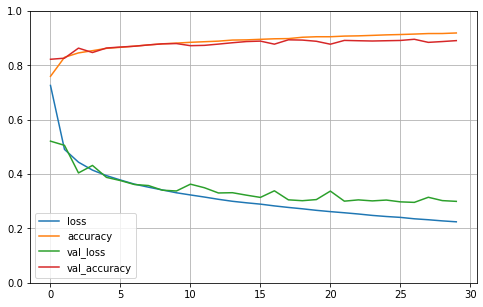

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True) # 격자 생성
plt.gca().set_ylim(0,1) # 수직축의 범위를 0~1로 지정
plt.show()

모델의 성능이 너무 낮다면 일반적으로
1. 학습률
2. 다른 옵티마이저
3. 층개수, 뉴런개수, 은닉층의 활성화함수
4. 배치크기 
순으로 하이퍼라미터를 수정한다.

### evaluate() 메소드
테스트세트로 모델평가

In [18]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3312 - accuracy: 0.8864


[0.3311586081981659, 0.8863999843597412]

~~엥... 예측 성능이 너무 낮다..~~

~~이거를 검색해 봤는데 그냥 진행바에 오류가 있다고 하는데.. 맞는지 모르겠다.~~
~~- https://stackoverflow.com/questions/44384924/model-evaluate-in-keras-do-not-cover-all-datapoints~~


~~이거는 뉴런들이 dropout 된다는데.. 잘모르겠다~~
~~- https://github.com/keras-team/keras/issues/6977~~

다시 실행하니까 된다. 이런;

### 모델을 사용해서 예측을 만들기

In [19]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 172ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

### predict_classes 메소드
2.6.0 버전이후로 이 메소드가 없어졌다. 그냥 predict메소드에 np.argmax를 적용해서 사용하면 된다

In [20]:
y_pred = np.argmax(y_proba,axis=-1)
y_pred
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [21]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

### 시퀀셜 API를 사용하여 회귀용 다층 퍼셉트론(MLP) 만들기
캘리포니아 주택가격

In [22]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_vaild = scaler.fit_transform(X_valid)
X_test = scaler.fit_transform(X_test)

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="sgd")
X_new = X_test[:3]

<b>분류와 회귀의 차이점은 출력층이 활성화 함수가 없는 하나의 뉴런을 가진다는 것과 손실함수로 평균 제곱 오차를 사용한다는 것이다. <br> 이 데이터는 오차가 많기 때문에 뉴런이 적은 하나의 은닉층을 사용할 것입니다.

In [23]:
history = model.fit(X_train, y_train, epochs=20,
                   validation_data=(X_valid, y_valid))
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 1.1597 - val_loss: 153848.2812
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.8361 - val_loss: 19253.9766
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4630 - val_loss: 72827.2031
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4421 - val_loss: 40321.3750
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4318 - val_loss: 60312.2773
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4236 - val_loss: 55164.6133
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4150 - val_loss: 74109.3438
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4088 - val_loss: 82298.5000
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4054 - val_loss: 50631.8281
Epoch 10/20
363/363 [==============================] - 1s 3ms/s

### 함수형 API를 사용해 복잡한 모델 만들기
Sequential 모델은 쉽지만 입력과 출력이 여러 개거나 더 복잡한 네트워크 토폴로지를 갖는 신경망을 만들어야할 때가 있다.

이럴때는 <b>함수형 API</b>를 사용한다. 

- <b> 와이드&딥 신경망
    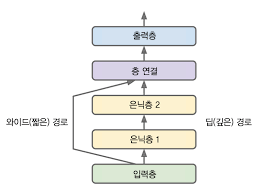

In [24]:
# Input 객체 만들기. 이 객체는 shape와 dtype을 포함해서 모델의 입력을 정의한다. 한 모델은 여러 입력을 가질수 있다.
input_ = keras.layers.Input(shape=X_train.shape[1:])

# 30개의 뉴런을 가지고 활성화함수로는 ReLU를 가진 Dense층을 만든다. 이 층은 만들어지자마자 입력과 함께 함수처럼 호출된다.
# 케라스에 층이 연결될 방법을 알려주었을 뿐 아직 어떤 데이터도 처리하지 않았다.
hidden1 = keras.layers.Dense(30, activation="relu")(input_)

# 두번째 은닉층을 만든다. 이 층은 hidden1과 연결되어있다.
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)

# Concatenate 층을 만들고 또 다시 함수처럼 호출하여 두 번째 은닉층의 출려과 입력을 연결한다. 
# 아래 함수는 Concatenate 층을 만들고 주어진 입력으로 바로 호출한다.
concat = keras.layers.Concatenate()([input_, hidden2])

# 하나의 뉴런과 활성화 함수가 없는 출력층을 만들고 Concatenate 층이 만든 결과를 사용해 호출한다.
output = keras.layers.Dense(1)(concat)

# 마지막으로 사용할 입력과 출력을 지정하여 케라스 Model을 만든다.
model_wide_deep = keras.Model(inputs=[input_], outputs=[output])

- <b> 일부 특성은 짧은 경로로 전달하고 다른 특성들은 깊은 경로로 전달하고 싶다면 어떻게 해야할까?

In [25]:
input_A = keras.layers.Input(shape=[5], name="wide input")
input_B = keras.layers.Input(shape=[6], name="deep input")

hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model_two_input_wide_deep = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [26]:
model_two_input_wide_deep.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

# 피처가 중복되도 괜찮다.
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:,:5], X_valid[:,2:]
X_test_A, X_test_B = X_test[:,:5], X_test[:,2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model_two_input_wide_deep.fit((X_train_A, X_train_B), y_train, epochs=20,
                   validation_data= ((X_valid_A, X_valid_B), y_valid))

mse_test = model_two_input_wide_deep.evaluate((X_test_A, X_test_B), y_test)
y_pred = model_two_input_wide_deep.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 2.0458 - val_loss: 23159.0430
Epoch 2/20
363/363 [==============================] - 1s 4ms/step - loss: 0.8263 - val_loss: 170099.2656
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.7071 - val_loss: 177741.2500
Epoch 4/20
363/363 [==============================] - 1s 4ms/step - loss: 0.6534 - val_loss: 158759.6562
Epoch 5/20
363/363 [==============================] - 1s 4ms/step - loss: 0.6161 - val_loss: 129512.7031
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5891 - val_loss: 102645.5859
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5692 - val_loss: 84712.2578
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5541 - val_loss: 71169.1250
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5433 - val_loss: 61333.6250
Epoch 10/20
363/363 [==============================] - 1s 4

In [27]:
model_two_input_wide_deep.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 deep input (InputLayer)        [(None, 6)]          0           []                               
                                                                                                  
 dense_11 (Dense)               (None, 30)           210         ['deep input[0][0]']             
                                                                                                  
 wide input (InputLayer)        [(None, 5)]          0           []                               
                                                                                                  
 dense_12 (Dense)               (None, 30)           930         ['dense_11[0][0]']               
                                                                                            

- <b> 여러개의 출력이 필요한 경우</b>

    ex) 
    1. 그림에 있는 주요 물체를 분류하고 위치를 알아야 하는 경우. (회귀작업 + 분류작업)
    2. 동일한 데이터에서 독립적인 여러 작업을 수행할 때. (다중 작업 분류)
    3. 규제기법을 사용하는 경우. 하위 네트워크가 나머지 네트워크에 의존하지 않고 그 자체로 유용한지를 판단할 때

In [28]:
input_A = keras.layers.Input(shape=[5], name="wide input")
input_B = keras.layers.Input(shape=[6], name="deep input")

hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_A, hidden2])
main_output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)

model_two_output_wide_deep = keras.Model(inputs=[input_A, input_B], outputs=[main_output, aux_output])

model_two_output_wide_deep.compile(loss=["mse", "mse"], optimizer="sgd", loss_weights = [0.9, 0.1])

# 피처가 중복되도 괜찮다.
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:,:5], X_valid[:,2:]
X_test_A, X_test_B = X_test[:,:5], X_test[:,2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model_two_output_wide_deep.fit((X_train_A, X_train_B), [y_train,y_train], epochs=20,
                   validation_data= ((X_valid_A, X_valid_B), (y_valid, y_valid)))

mse_test = model_two_output_wide_deep.evaluate((X_test_A, X_test_B), y_test)
y_pred_main, y_pred_aux = model_two_output_wide_deep.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 4s 6ms/step - loss: 0.9897 - main_output_loss: 0.8777 - aux_output_loss: 1.9980 - val_loss: 52730.6016 - val_main_output_loss: 30485.6211 - val_aux_output_loss: 252935.3125
Epoch 2/20
363/363 [==============================] - 1s 4ms/step - loss: 0.6853 - main_output_loss: 0.6422 - aux_output_loss: 1.0726 - val_loss: 23022.1328 - val_main_output_loss: 9170.2549 - val_aux_output_loss: 147688.9531
Epoch 3/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5837 - main_output_loss: 0.5465 - aux_output_loss: 0.9181 - val_loss: 27494.3398 - val_main_output_loss: 20054.1270 - val_aux_output_loss: 94456.1719
Epoch 4/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5384 - main_output_loss: 0.5087 - aux_output_loss: 0.8053 - val_loss: 23686.7637 - val_main_output_loss: 15905.2549 - val_aux_output_loss: 93720.3750
Epoch 5/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5134 - main_output_

In [29]:
total_loss, main_loss ,aux_loss = model_two_output_wide_deep.evaluate([X_test_A, X_test_B], [y_test, y_test])

162/162 [==============================] - 0s 3ms/step - loss: 0.3628 - main_output_loss: 0.3488 - aux_output_loss: 0.4885


In [30]:
class Dynamic_WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs) # 표준 매개변수를 처리한다. ex) name
        self.hidden1 = keras.layers.Dense(units, activation= activation)
        self.hidden2 = keras.layers.Dense(units, activation= activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A , input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input1, input2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output
    
dynamic_wide_deep_model = Dynamic_WideAndDeepModel()

이 예제는 함수형 API와 굉장히 비슷하지만, call함수에 무수히 많은 계산들을 넣을 수도 있다. 자유자재로 변형이 가능하다는 것이다.

하지만 call함수에 층간의 관계가 있으므로 모델을 저장하거나 복사할 수가 없다는 불편함이 존재한다.

### 모델 저장과 복원
시퀀셜 API나 함수형 API를 사용하면 모델을 저장하는 것은 다음과 같이 매수 쉽다.

``` python
## 모델 저장
model = keras.models.Sequential([...])
model.compile([...])
model.fit([...])
model.save("my_keras_model.h5")

## 모델 불러오기
model = keras.models.load_model("my_keras_model.h5")
```

## 콜백 사용하기
fit 메소드에서 체크포인트를 저장하는 방법

### 텐서보드를 사용해서 시각화하기

In [31]:
import os 
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

In [32]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                   validation_data=(X_valid, y_valid),
                   callbacks=[tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 1s 4ms/step - loss: 0.3637 - val_loss: 53801.4961
Epoch 2/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3629 - val_loss: 27846.7598
Epoch 3/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3622 - val_loss: 34074.1211
Epoch 4/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3587 - val_loss: 28352.1562
Epoch 5/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3560 - val_loss: 40420.8750
Epoch 6/30
363/363 [==============================] - 1s 4ms/step - loss: 0.3562 - val_loss: 44642.9961
Epoch 7/30
363/363 [==============================] - 1s 4ms/step - loss: 0.3522 - val_loss: 70705.3125
Epoch 8/30
363/363 [==============================] - 1s 4ms/step - loss: 0.3502 - val_loss: 51822.0352
Epoch 9/30
363/363 [==============================] - 1s 4ms/step - loss: 0.3488 - val_loss: 27289.7949
Epoch 10/30
363/363 [==============================] - 1s 3ms/st

In [33]:
# 주피터 노트북 내부에서 텐서보드 사용
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

Reusing TensorBoard on port 6006 (pid 17440), started 3 days, 23:07:48 ago. (Use '!kill 17440' to kill it.)

### 신경망 하이퍼파라미터 튜닝하기
그리드서치 or RandomizedSearchCV를 사용하기 위해서는 케라스 모델을 사이킷런 추정기처럼 보이도록 해야한다.

In [34]:
def bulid_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayers(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

keras_reg = keras.wrappers.scikit_learn.KerasRegressor(bulid_model)

C:\Users\user\AppData\Local\Temp/ipykernel_12716/3126652774.py:11: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = keras.wrappers.scikit_learn.KerasRegressor(bulid_model)


위와 같은 오류가 떴다. 그래서 scikeras를 설치했다.

In [35]:
import scikeras

In [36]:
from scikeras.wrappers import KerasClassifier, KerasRegressor

def bulid_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

keras_reg = scikeras.wrappers.KerasRegressor(bulid_model)

사이킷런 추정기처럼 보이게 하는 래퍼를 감싸면 사이킷런에서 사용되는 메소드를 사용할 수 있다.

In [37]:
keras_reg.fit(X_train, y_train, epochs=50,
             validation_data=(X_valid, y_valid),
             callbacks=[keras.callbacks.EarlyStopping(patience=10)])
mse_test = keras_reg.score(X_test, y_test)
y_pred = keras_reg.predict(X_new)

Epoch 1/50
363/363 [==============================] - 1s 3ms/step - loss: 1.5383 - val_loss: 100063.3438
Epoch 2/50
363/363 [==============================] - 1s 3ms/step - loss: 0.7809 - val_loss: 113323.7109
Epoch 3/50
363/363 [==============================] - 1s 3ms/step - loss: 0.6223 - val_loss: 63210.6211
Epoch 4/50
363/363 [==============================] - 1s 3ms/step - loss: 0.5673 - val_loss: 89869.0156
Epoch 5/50
363/363 [==============================] - 1s 3ms/step - loss: 0.5348 - val_loss: 61910.8594
Epoch 6/50
363/363 [==============================] - 1s 2ms/step - loss: 0.5124 - val_loss: 44106.4922
Epoch 7/50
363/363 [==============================] - 1s 3ms/step - loss: 0.5005 - val_loss: 38721.6602
Epoch 8/50
363/363 [==============================] - 1s 3ms/step - loss: 0.4917 - val_loss: 29073.8086
Epoch 9/50
363/363 [==============================] - 1s 3ms/step - loss: 0.4848 - val_loss: 28429.7500
Epoch 10/50
363/363 [==============================] - 1s 3ms/

In [38]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

keras_reg.get_params().keys()

param_distribs = {
    "n_hidden": [0,1,2,3],
    "n_neurons": np.arange(1,100),
    "learning_rate": reciprocal(3e-4, 3e-2),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                 validation_data=(X_valid, y_valid),
                 callbacks=[keras.callbacks.EarlyStopping(patience=10)])

ValueError: Invalid parameter learning_rate for estimator KerasRegressor.
This issue can likely be resolved by setting this parameter in the KerasRegressor constructor:
`KerasRegressor(learning_rate=0.007128700290480555)`
Check the list of available parameters with `estimator.get_params().keys()`

으악 책에 나온대로 안하고 sci-keras를 사용하니까 오류가 뜸... 아래는 제대로 나온다ㅜㅜ 뭔지를 모르겠다

-------------

In [39]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation='relu'))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss='mse', optimizer=optimizer)
    return model

keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

C:\Users\user\AppData\Local\Temp/ipykernel_12716/3730239423.py:11: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)


잘 모르겠는 부분이 있는데, 래퍼로 감싸면 scikit_learn형태일텐데 keras의 파라미터를 받아서 랜덤서치를 해도 되는건가??? 
scikeras를 사용했을 때는 오류가 떠서 의문이 들었다.

### 연습문제 2

논리 연산에 대한 문제는 잘 모르겠다...

### 연습문제 3

고전적인 퍼셉트론보다 로지스틱 회귀 분류가 선호되는 이유는 
1. 클래스별 확률을 제공하지 않음 (왜냐하면 계단형식의 활성화함수를 사용하기 때문이다.)
2. 데이터가 선형적으로 구분 될 때만 수렴한다. (논리연산과 관련이 있는 것 같은데 잘 모르겠다.)
이를 해소하기 위해서는 활성화 함수를 로지스틱 활성화 함수로 바꾸고 경사하강법으로 훈련한다. 또한 다층 퍼셉트론을 사용하면 된다.

### 연습문제 4

경사가 없는 계단 함수는 경사하강법을 적용할 수 없기 때문에 경사가 있는 로지스틱 활성화 함수를 사용했다. 
또한, 실제 뉴런의 활성화함수 모양이 로지스틱 활성화 함수와 비슷하다고 생각했기 때문이다.

### 연습문제 5

1. ReLU
2. tanh 함수
3. 시그모이드 함수

### 연습문제 6

- 입력 행렬 X의 크기는 m * 10 이다. (m은 배치의 크기이다.)
- 은닉층의 가중치 행렬(W_h)은 10 * 50 이다. 은닉층의 편향(b_h)행렬은 1 * 50 이다.
- 출력층의 가중치 행렬(W_o)은 50 * 3 이다. 은닉층의 편향(b_o)행렬은 1 * 3 이다. 
- 네트워크 출력 행렬 Y의 크기는 m * 3이다. 


- 출력 행렬: Y = ReLU(ReLU(W_h\*X+b_h)\*W_o+b_o)  

### 연습문제 7

~~스팸 구별문제는 출력층에 스팸/비스팸을 구별할 수 있도록 두개의 뉴런이 필요하다. 출력층 함수는 출력 결과가 서로 배타적이므로 소프트맥스함수가 적절할 것 같다.~~ 이 방법이 아닌 한개의 출력 뉴런을 가지고 활성화함수는 로지스틱 활성화 함수를 가지는 뉴런이여도 괜찮다.
보통 이진 분류에는 로지스틱 활성화 함수가 사용된다. 


Mnist 구별문제는 출력층에 10개의 뉴런이 필요하다. 또한 소프트 맥스함수를 사용하면 될 것 같다.

회귀문제는 출력에 1개의 뉴런이 필요하다. 이건 활성화 함수가 필요 없다.

### 연습문제 8

역전파는 여러 층으로 이루어져 있는 모델의 뉴런들을 학습하는 방법이다. 여기에는 경사하강법이 이용되는데 이때 그래디언트를 계산하기 위한 방법이 후진 모드 자동 미분이다.

### 연습문제 9

다층 퍼셉트론에서 조정할 수 있는 파라미터는
- 뉴런 개수
- 은닉층 수
- 학습률
- 옵티마이저
- 활성화 함수
가 있다. 
과대 적합이 발생하면 뉴런개수를 줄이고, 은닉층 수를 줄이는 방법이 있고, 
규제를 통해서 과대적합을 해소할 수 있다. 

### 연습문제 10

#### 0. 모듈 import 

In [8]:
import tensorflow as tf
from tensorflow import keras

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

In [9]:
# clear_session
# keras.backend.clear_session()
# 현재 TF 그래프를 없애고, 새로운 TF 그래프를 만듭니다.
#오래된 모델 혹은 층과의 혼란을 피할 때 유용합니다.
keras.backend.clear_session()

np.random.seed(42)

tf.random.set_seed(42)

#### 1. 데이터 적재/ test_train셋 분리/ 스케일링/

In [10]:
# 데이터 로드
mnist_data = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [11]:
train, test= mnist_data
X_train_full, y_train_full, X_test, y_test = train[0], train[1], test[0], test[1]

# 검증셋을 20%로 하니까 accuracy가 너무 낮았다. 그래서 작게했다. 
X_train, X_valid = X_train_full[5000:], X_train_full[:5000]
y_train, y_valid = y_train_full[5000:], y_train_full[:5000]

# mnist 데이터는 0~255의 범위를 가지므로 0~1 사이의 범위를 갖도록 
X_train, X_valid, X_test = X_train/255.0, X_valid/255.0, X_test/255.0


print("X_train 크기: ", X_train.shape)
print("X_valid 크기: ", X_valid.shape)
print("y_train 크기: ", y_train.shape)
print("y_valid 크기: ", y_valid.shape)

X_train 크기:  (55000, 28, 28)
X_valid 크기:  (5000, 28, 28)
y_train 크기:  (55000,)
y_valid 크기:  (5000,)


#### 2. 모델 구현2. 모델 구현<br>
- 시퀀셜 api 사용 

A. 입력층에 784개의 뉴런이 필요함<br>
B. 첫번째 은닉층에 300개의 뉴런 (활성화 함수 ReLU)<br>
C. 두번째 은닉층에 100개의 뉴런 (활성화 함수 ReLU)<br>
D. 출력층에 10개의 뉴런을 사용한다. (활성화 함수 softmax)<br>

In [44]:
model_my = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

#### 3. 모델 compile<br>

A. 학습률 (학습률을 지수적으로 증가시키면서 찾기)<br>
B. 옵티마이저   <br>
C. 손실함수 (분류기 때문에 카테고리 엔트로피 함수 사용하면 될 듯)<br>
D. 평가

In [45]:
model_my.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

#### 4. 모델 fit <br>
A. X_train, y_train<br>
B. 조기종료 (X_valid, y_valid)<br>
C. 텐서 보드 사용하기<br>

In [46]:
import os 
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)

history = model_my.fit(X_train, y_train, epochs=100,
                   validation_data=(X_valid, y_valid),
                   callbacks= [early_stopping_cb, tensorboard_cb])


Epoch 1/100
1719/1719 [==============================] - 9s 5ms/step - loss: 0.6301 - accuracy: 0.8345 - val_loss: 0.3080 - val_accuracy: 0.9166
Epoch 2/100
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2878 - accuracy: 0.9184 - val_loss: 0.2388 - val_accuracy: 0.9330
Epoch 3/100
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2329 - accuracy: 0.9336 - val_loss: 0.1979 - val_accuracy: 0.9444
Epoch 4/100
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1971 - accuracy: 0.9440 - val_loss: 0.1739 - val_accuracy: 0.9546
Epoch 5/100
1719/1719 [==============================] - 8s 4ms/step - loss: 0.1716 - accuracy: 0.9509 - val_loss: 0.1543 - val_accuracy: 0.9584
Epoch 6/100
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1520 - accuracy: 0.9570 - val_loss: 0.1415 - val_accuracy: 0.9630
Epoch 7/100
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1363 - accuracy: 0.9623 - val_loss: 0.1304 - val_ac

In [47]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 17440), started 3 days, 23:19:41 ago. (Use '!kill 17440' to kill it.)

In [49]:
model_my.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0714 - accuracy: 0.9795


[0.0713987722992897, 0.9794999957084656]

### 학습률 튜닝 
이 아래 코드는 잘 모르겠어서 답안을 참조했습니다. 

In [5]:
# 잘은 모르겠지만 이해한 내용을 써본다.
# keras 는 low-level에서의 조정은 안된다. 왜냐하면 쉽게 사용하기 위한 딥러닝 api이기 때문이다. 
# 하지만 keras.backend를 사용하면 low-level에서의 조정이 가능하다.
## set_value
## keras.backend.set_value(x, value) 로 사용한다. 
#  반복마다 학습률을 증가시키기 위해 콜백을 사용합니다. 이 콜백은 반복마다 학습률과 손실을 기록합니다.
K = keras.backend

# 학습률을 지수함수적으로 증가시키면서 성능을 보는 콜백함수를 만들 클래스를 만든 것?
class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
        
        
    # 파라미터로 들어간 batch는 잘 모르겠다. logs 는 모델이 학습된 기록들을 가져오는 것 같다.
    def on_batch_end(self, batch, logs):
        # 현재 학습 모델의 학습률을 가져와서 리스트에 추가
        self.rates.append(K.get_value(self.model.optimizer.lr))
        # 현재 학습 모델의 손실을 리스트에 추가
        self.losses.append(logs["loss"])
        # 학습률에 self.factor을 곱한값을 학습률로 재설정
        K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)

In [12]:
# clear_session
# keras.backend.clear_session()
# 현재 TF 그래프를 없애고, 새로운 TF 그래프를 만듭니다.
#오래된 모델 혹은 층과의 혼란을 피할 때 유용합니다.
keras.backend.clear_session()

np.random.seed(42)

tf.random.set_seed(42)

In [15]:
model_anwser = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model_anwser.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])
expon_lr = ExponentialLearningRate(factor=1.005)

history = model_anwser.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[expon_lr])

1719/1719 [==============================] - 2s 1ms/step - loss: nan - accuracy: 0.6270 - val_loss: nan - val_accuracy: 0.0958


Text(0, 0.5, 'Loss')

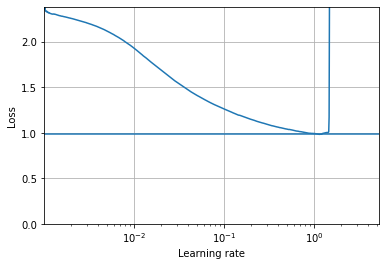

In [16]:
import matplotlib.pyplot as plt

plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")

In [17]:
expon_lr.losses

[2.387019634246826,
 2.376983165740967,
 2.3636763095855713,
 2.37388277053833,
 2.3640472888946533,
 2.3509280681610107,
 2.3422930240631104,
 2.340693712234497,
 2.3402111530303955,
 2.3343379497528076,
 2.3327927589416504,
 2.334876298904419,
 2.3315837383270264,
 2.3315017223358154,
 2.333292245864868,
 2.333632469177246,
 2.3276474475860596,
 2.3256337642669678,
 2.3249316215515137,
 2.3227503299713135,
 2.3226845264434814,
 2.320162534713745,
 2.3219406604766846,
 2.3205840587615967,
 2.319373369216919,
 2.3155317306518555,
 2.3164124488830566,
 2.3154542446136475,
 2.314448595046997,
 2.3127732276916504,
 2.31126070022583,
 2.3113842010498047,
 2.3105456829071045,
 2.309812545776367,
 2.3082058429718018,
 2.307255983352661,
 2.3075315952301025,
 2.3074233531951904,
 2.306504249572754,
 2.3061470985412598,
 2.305089235305786,
 2.304429531097412,
 2.3048253059387207,
 2.304718255996704,
 2.303907871246338,
 2.3048267364501953,
 2.3046836853027344,
 2.304267406463623,
 2.3054850101

그래프를 보고 학습률를 튜닝해준다.

In [60]:
# clear_session
# keras.backend.clear_session()
# 현재 TF 그래프를 없애고, 새로운 TF 그래프를 만듭니다.
#오래된 모델 혹은 층과의 혼란을 피할 때 유용합니다.
keras.backend.clear_session()

np.random.seed(42)

tf.random.set_seed(42)

model_last = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model_last.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=3e-1),
              metrics=["accuracy"])

early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_mnist_model.h5", save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model_last.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

Epoch 1/100
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2333 - accuracy: 0.9267 - val_loss: 0.1018 - val_accuracy: 0.9688
Epoch 2/100
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0941 - accuracy: 0.9708 - val_loss: 0.0995 - val_accuracy: 0.9730
Epoch 3/100
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0643 - accuracy: 0.9802 - val_loss: 0.0771 - val_accuracy: 0.9768
Epoch 4/100
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0469 - accuracy: 0.9849 - val_loss: 0.0730 - val_accuracy: 0.9810
Epoch 5/100
1719/1719 [==============================] - 8s 4ms/step - loss: 0.0345 - accuracy: 0.9885 - val_loss: 0.0880 - val_accuracy: 0.9778
Epoch 6/100
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0288 - accuracy: 0.9911 - val_loss: 0.0680 - val_accuracy: 0.9818
Epoch 7/100
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0210 - accuracy: 0.9928 - val_loss: 0.0726 - val_ac

In [61]:
model = keras.models.load_model("my_mnist_model.h5") # rollback to best model
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0690 - accuracy: 0.9814


[0.06899699568748474, 0.9814000129699707]

In [62]:
%tensorboard --logdir=./my_mnist_logs --port=6006

Reusing TensorBoard on port 6006 (pid 13396), started 0:29:53 ago. (Use '!kill 13396' to kill it.)